### IPL Team stats for all seasons

#### All imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim
import folium

from wordcloud import WordCloud
from collections import Counter

import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns

import circlify

### Short names used across the project

In [3]:
df = pd.read_csv("../data/points_table.csv")
short_names = {}

for row in df.iterrows():
    short_names.update({row[1]["name"]:row[1]["short_name"]})
short_names

{'Mumbai Indians': 'MI',
 'Delhi Capitals': 'DC',
 'Sunrisers Hyderabad': 'SRH',
 'Royal Challengers Bangalore': 'RCB',
 'Kolkata Knight Riders': 'KKR',
 'Kings XI Punjab': 'KXIP',
 'Chennai Super Kings': 'CSK',
 'Rajasthan Royals': 'RR',
 'Rising Pune Supergiant': 'RPS',
 'Gujarat Lions': 'GL',
 'Pune Warriors': 'PWI',
 'Deccan Chargers': 'SRH',
 'Kochi Tuskers Kerala': 'Kochi'}

### Team Logos

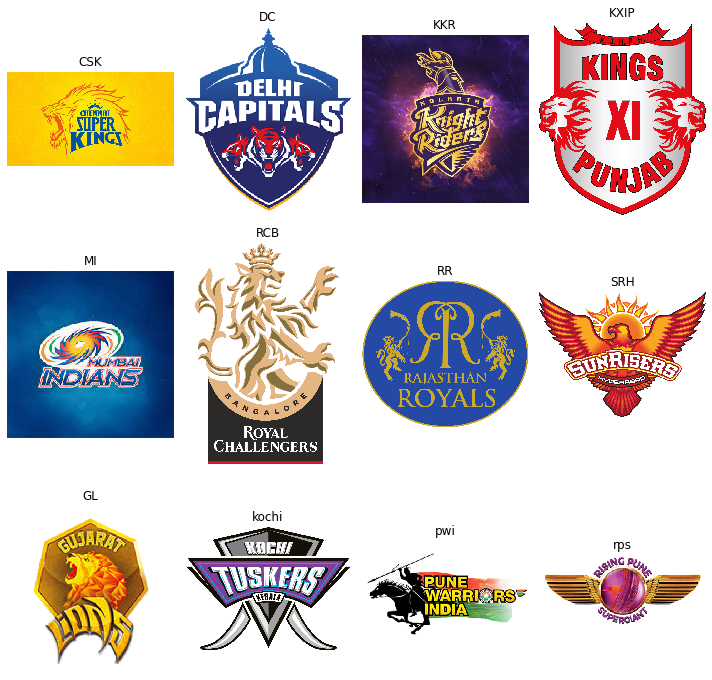

In [4]:
team_logos = {}
team_logos['CSK'] = "../team_logos/csk.jpg"
team_logos['DC'] = "../team_logos/dc.png"
team_logos['KKR'] = "../team_logos/kkr.jpg"
team_logos['KXIP'] = "../team_logos/kxip.png"
team_logos['MI'] = "../team_logos/mi.jpg"
team_logos['RCB'] = "../team_logos/rcb.png"
team_logos['RR'] = "../team_logos/rr.png"
team_logos['SRH'] = "../team_logos/srh.png"
team_logos['GL'] = "../team_logos/gl.png"
team_logos['kochi'] = "../team_logos/kochi.png"
team_logos['pwi'] = "../team_logos/pwi.png"
team_logos['rps'] = "../team_logos/rps.png"

fig = plt.figure(figsize=(5, 5))
fig.set_size_inches(10,10)

plt.subplots_adjust(wspace= 0, hspace= 0)
rows,columns,position = 3, 4, 1
for team in team_logos:
    fig.add_subplot(rows,columns,position)
    image = plt.imread(team_logos[team])
    plt.imshow(image, interpolation='nearest')
    plt.title(team)
    plt.axis('off')
    position+=1
    
plt.tight_layout()

## Stats of a each season

In [5]:
batting_card = pd.read_csv("../data/all_season_batting_card.csv")
total_fours = batting_card.groupby('season')['fours'].sum()
total_fours

season
2008    1703.0
2009    1316.0
2010    1709.0
2011    1913.0
2012    1911.0
2013    2052.0
2014    1562.0
2015    1607.0
2016    1632.0
2017    1609.0
2018    1651.0
2019    1652.0
2020    1582.0
Name: fours, dtype: float64

In [6]:
total_sixes = batting_card.groupby('season')['sixes'].sum()
total_sixes

season
2008    622.0
2009    506.0
2010    585.0
2011    639.0
2012    731.0
2013    672.0
2014    714.0
2015    692.0
2016    638.0
2017    705.0
2018    872.0
2019    784.0
2020    734.0
Name: sixes, dtype: float64

In [7]:
total_fours_team = batting_card.groupby(['season', 'current_innings'])['fours'].sum()
total_fours_team

season  current_innings
2008    CSK                244.0
        DC                 218.0
        KKR                162.0
        KXIP               231.0
        MI                 197.0
                           ...  
2020    KXIP               179.0
        MI                 222.0
        RCB                176.0
        RR                 171.0
        SRH                213.0
Name: fours, Length: 108, dtype: float64

In [8]:
total_sixes_team = batting_card.groupby(['season', 'current_innings'])['sixes'].sum()
total_sixes_team

season  current_innings
2008    CSK                 86.0
        DC                  54.0
        KKR                 75.0
        KXIP                95.0
        MI                  76.0
                           ...  
2020    KXIP                98.0
        MI                 137.0
        RCB                 66.0
        RR                 105.0
        SRH                 79.0
Name: sixes, Length: 108, dtype: float64

In [9]:
batting_output = {}
for season, data in batting_card.groupby('season'):
    batting_output[season] = data.groupby('name')['runs'].sum().sort_values(ascending=False)[:5]

In [10]:
bowling_card = pd.read_csv("../data/all_season_bowling_card.csv")
bowling_output = {}
for season, data in bowling_card.groupby('season'):
    bowling_output[season] = data.groupby('name')['wickets'].sum().sort_values(ascending=False)[:5]

In [11]:
points_table = pd.read_csv("../data/points_table.csv")
team_rankings = {}
for season, data in points_table.groupby('season'):
    team_rankings[season]=data

In [12]:
most_valuable_player = {2008 : 'Shane Watson',
                        2009 : 'Adam Gilchrist',
                        2010 : 'Sachin Tendulkar',
                        2011 : 'Chris Gayle',
                        2012 : 'Sunil Narine',
                        2013 : 'Shane Watson',
                        2014 : 'Glenn Maxwell',
                        2015 : 'Andre Russell',
                        2016 : 'Virat Kohli',
                        2017 : 'Ben Stokes',
                        2018 : 'Sunil Narine',
                        2019 : 'Andre Russell',
                        2020 : 'Jofra Archer'}

emerging_player = {2008 : 'Shreevats Goswami',
                   2009 : 'Rohit Sharma',
                   2010 : 'Saurabh Tiwary',
                   2011 : 'Iqbal Abdulla',
                   2012 : 'Mandeep Singh',
                   2013 : 'Sanju Samson',
                   2014 : 'Axar Patel',
                   2015 : 'Shreyas Iyer',
                   2016 : 'Mustafizur Rahman',
                   2017 : 'Basil Thampi',
                   2018 : 'Rishabh Pant',
                   2019 : 'Shubman Gill',
                   2020 : 'Devdutt Padikkal'}
fair_play =  {2008 : 'CSK',
                   2009 : 'KXIP',
                   2010 : 'CSK',
                   2011 : 'CSK',
                   2012 : 'RR',
                   2013 : 'CSK',
                   2014 : 'CSK',
                   2015 : 'CSK',
                   2016 : 'SRH',
                   2017 : 'GL',
                   2018 : 'MI',
                   2019 : 'SRH',
                   2020 : 'MI'}


Input a season to visualize stats of that season 2009


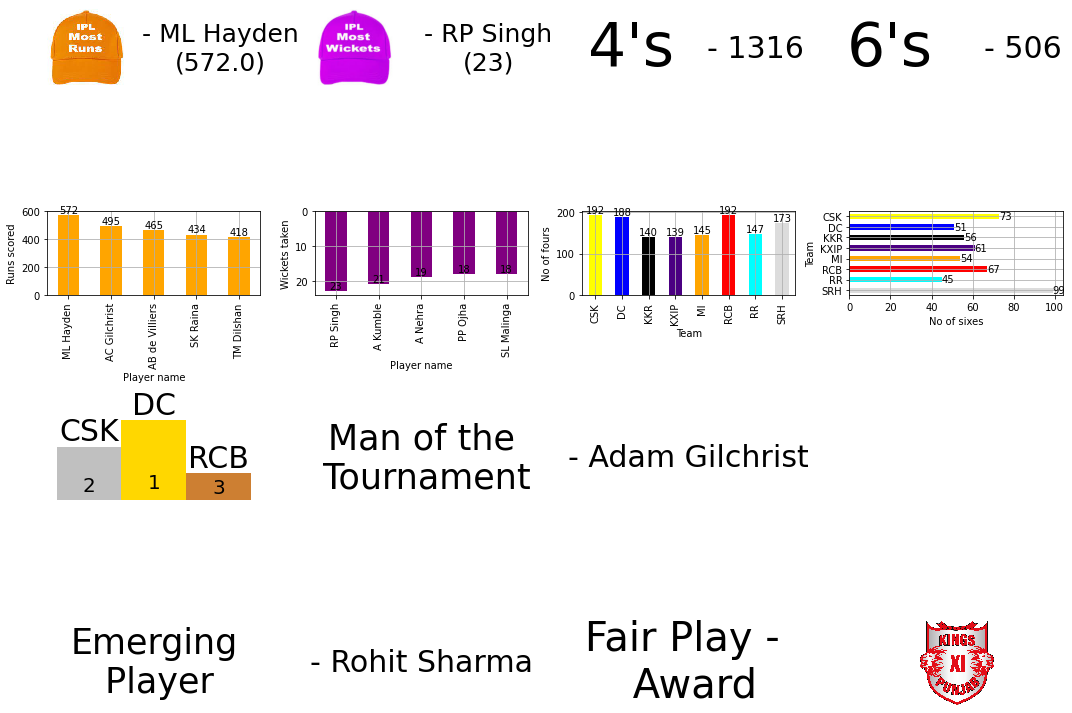

In [16]:
season = int(input("Input a season to visualize stats of that season"))

color_discrete_map={'CSK':'yellow', 'MI':'blue', 'KKR':'black', 'DC':'indigo', 'SRH':'orange', 'RCB':'red', 'RR':'cyan', 'KXIP':'Gainsboro'}

rows = 4
columns= 8
fig = plt.figure(figsize=(1, 1))
fig.set_size_inches(1,1)

plt.subplots_adjust(wspace= 0, hspace= 0)

image1 = plt.imread("../images/orange cap.jpeg")
image2 = plt.imread("../images/purple_cap.jpeg")

fig.add_subplot(rows,columns,1) 
plt.imshow(image1, interpolation='nearest')
plt.axis('off')

fig.add_subplot(rows, columns,2) 
plt.text(0.5, 0.5,f"- {batting_output[season].index[0]}\n({batting_output[season][0]})", fontsize=25,
         horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,3) 
plt.imshow(image2)
plt.axis('off')

fig.add_subplot(rows, columns,4) 
plt.text(0.5, 0.5,f"- {bowling_output[season].index[0]}\n({bowling_output[season][0]})", fontsize=25,
         horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,5)
plt.text(0.5, 0.5," 4's", fontsize=60, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,6)
plt.text(0.5, 0.5,f"- {int(total_fours[season])}", fontsize=30, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,7)
plt.text(0.5, 0.5,"6's", fontsize=60, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,8) 
plt.text(0.5, 0.5,f"- {int(total_sixes[season])}", fontsize=30, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,(9, 10))
ax = batting_output[season].plot.bar(figsize=(15,10), grid=True, color='orange')
ax.set_xlabel("Player name")
ax.set_ylabel("Runs scored")
ax.bar_label(ax.containers[0])

fig.add_subplot(rows, columns,(11, 12)) 
ax = bowling_output[season].plot.bar(figsize=(15,10),grid=True, color='purple')
plt.gca().invert_yaxis()
ax.set_xlabel("Player name")
ax.set_ylabel("Wickets taken")
ax.bar_label(ax.containers[0])

fig.add_subplot(rows, columns,(13, 14)) 
ax = total_fours_team[season].plot.bar(figsize=(15,10),grid=True, color=color_discrete_map.values())
ax.set_xlabel("Team")
ax.set_ylabel("No of fours")
ax.bar_label(ax.containers[0])


fig.add_subplot(rows, columns,(15, 16))
ax = total_sixes_team[season].plot.barh(figsize=(15,10),grid=True, color=color_discrete_map.values())
ax.set_ylabel("Team")
ax.set_xlabel("No of sixes")
ax.invert_yaxis()
ax.bar_label(ax.containers[0])

ax = fig.add_subplot(rows, columns, (17, 18))
top_teams = team_rankings[season]['short_name'][:3].to_list()
updated_top_teams = [top_teams[1], top_teams[0], top_teams[2]]

bar_plot = plt.bar([1, 2, 3], [2, 3, 1], color = ['#C0C0C0', '#FFD700', '#CD7F32'],width=1.0)
labels = [2, 1, 3]
plt.axis('off')
# ax.set_xlabel("Top 3 teams of the season", loc='center')
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.1*height,
                labels[idx], ha='center', va='bottom', fontsize=20)
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                updated_top_teams[idx], ha='center', va='bottom', fontsize=30)

autolabel(bar_plot)

fig.add_subplot(rows, columns,(19, 20))
plt.text(0.5, 0.5,"Man of the\n Tournament", fontsize=35, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,(21, 22))
plt.text(0.5, 0.5,f"- {most_valuable_player[season]}", fontsize=30, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,(25, 26))
plt.text(0.5, 0.5,"Emerging\n Player", fontsize=35, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,(27, 28))
plt.text(0.5, 0.5,f"- {emerging_player[season]}", fontsize=30, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows, columns,(29, 30))
plt.text(0.5, 0.5,"Fair Play - \n Award", fontsize=40, horizontalalignment='center',verticalalignment='center')
plt.axis('off')

fig.add_subplot(rows,columns,(31, 32))
image = plt.imread(team_logos[fair_play[season]])
plt.imshow(image, interpolation='nearest')
plt.axis('off')

plt.grid()
fig.tight_layout()
